# Analysis of nycflights13 dataset using Python (Pandas, NumPy, and SkLearn)

nycflights13 contains details of all the flights that departed NYC in the year 2013.

Data  : https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf



In [74]:
#IPython is what you are using now to run the notebook
import IPython
print ("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print ("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print ("Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       5.3.0 (need at least 1.0)
Numpy version:        1.12.1 (need at least 1.7.1)
SciPy version:        0.19.0 (need at least 0.12.0)
Pandas version:       0.19.2 (need at least 0.11.0)
Mapltolib version:     2.0.0 (need at least 1.2.1)
Scikit-Learn version: 0.18.1 (need at least 0.13.1)


In [75]:
import matplotlib.pyplot as plt

In [76]:
flights_df= pd.read_csv('flights.csv')
matplotlib.style.use('ggplot')

In [77]:
print (flights_df.shape)
print (flights_df.columns)
print (flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [78]:
flights_df.dest.unique()
flights_df.head(10)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


Let’s explore flights from NYC to Seattle. Using the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [79]:
# Your code here
flights_nyc_seattle = flights_df[(flights_df['origin'].isin(['JFK', 'LGA', 'EWR'])) & 
           (flights_df['dest'] == 'SEA') & (flights_df['year'] == 2013)]
flights_nyc_seattle.shape[0]

3923

There were 3923 flights from NYC airport (JFK, LGA, EWR) to Seattle (SEA) in 2013.

(b) How many airlines fly from NYC to Seattle?

In [80]:
# Your code here
flights_nyc_seattle['carrier'].nunique()

5


 Five airlines fly from NYC to Seattle.

(c) How many unique air planes fly from NYC to Seattle?

In [201]:
# Your code here
flights_nyc_seattle['tailnum'].nunique()

935

 935 unique air planes fly from NYC to Seattle.

(d) What is the average arrival delay for flights from NC to Seattle?

In [82]:
# Your code here
flights_nyc_seattle['arr_delay'].mean()

-1.0990990990990992

The average arrival delay for flights from NYC to Seattle is -1.099 minutes. The negative time indicates that flights from NYC to Seattle arrived earlier than their usual arrival times.

(e) What proportion of flights to Seattle come from each NYC airport?

In [83]:
# Your code here
proportion_EWR_flights = flights_nyc_seattle[flights_nyc_seattle['origin'] == 'EWR'].shape[0]/flights_nyc_seattle.shape[0]
proportion_JFK_flights = flights_nyc_seattle[flights_nyc_seattle['origin'] == 'JFK'].shape[0]/flights_nyc_seattle.shape[0]
proportion_LGA_flights = flights_nyc_seattle[flights_nyc_seattle['origin'] == 'LGA'].shape[0]/flights_nyc_seattle.shape[0]
print('Proportion of flights from EWR = ' + str(proportion_EWR_flights * 100))
print('Proportion of flights from JFK = ' + str(proportion_JFK_flights * 100))
print('Proportion of flights from LGA = ' + str(proportion_LGA_flights * 100))


Proportion of flights from EWR = 46.673464185572264
Proportion of flights from JFK = 53.326535814427736
Proportion of flights from LGA = 0.0


 The proportion of flights from EWR to Seattle is 46.67%
 
 The proportion of flights from JFK to Seattle is 53.33%
 
 The proportion of flights from LGA to Seattle is 0.0%
 


Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [84]:
#Creating a new column date in the format YYYY/MM/DD.
flights_df['date'] = flights_df['year'].astype(str) + '/' + flights_df['month'].astype(str) + '/' + flights_df['day'].astype(str)
flight_avg_by_date = flights_df.groupby('date').mean()
print(flight_avg_by_date.sort_values(['dep_delay'], ascending=False)['dep_delay'].head(1))
print(flight_avg_by_date.sort_values(['arr_delay'], ascending=False)['arr_delay'].head(1))

date
2013/3/8    83.536921
Name: dep_delay, dtype: float64
date
2013/3/8    85.862155
Name: arr_delay, dtype: float64




With an average departure delay of 83.53 minutes, NYC experienced the largest average departure delay of airlines on 8th March 2013.

With an average arrival delay of 85.86 minutes, NYC experienced the largest average arrival delay of airlines on 8th March 2013.

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [85]:
# The average total delay can be one criteria to evaluate the worst day to fly out in 2013.
flight_avg_by_date['total_delay'] = flight_avg_by_date['arr_delay'] + flight_avg_by_date['dep_delay']
print(flight_avg_by_date.sort_values(['total_delay'], ascending=False)['total_delay'].head(1))


# Another criteria to evaluate the worst day can be the percentage of flights whose departure was delayed.
flights_dep_delay = flights_df.loc[flights_df['dep_delay'] > 0,:]
flights_dep_delay = pd.DataFrame(flights_dep_delay.groupby('date').count())
flights_dep_delay = flights_dep_delay.rename(columns={'Unnamed: 0' : 'count'})

flights_per_day = pd.DataFrame(flights_df.groupby('date').count())
flights_per_day = flights_per_day.rename(columns={'Unnamed: 0' : 'count'})
print((flights_dep_delay['count'] / flights_per_day['count'] * 100).sort_values(ascending=False).head(1))

date
2013/3/8    169.399077
Name: total_delay, dtype: float64
date
2013/12/23    68.426396
Name: count, dtype: float64


1. If we consider the average total delay as a criteria, then 8th March 2013, with an average total delay of 169.40 minutes, was the worst day to fly out of NYC.
2. If we consider the percentage of flights whose departure was delayed as a criteria, then 23rd December 2013 was the worst day to flight out as 68.42% of the scheduled flights were delayed on that day.

(c) Are there any seasonal patterns in departure delays for flights from NYC?

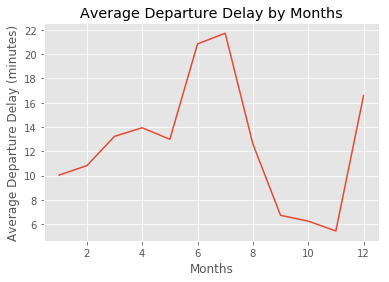

In [86]:
# Plotting average departure delay per months in 2013.
plt.plot(flights_df.groupby('month').mean().dep_delay)
plt.xlabel('Months')
plt.ylabel('Average Departure Delay (minutes)')
plt.title('Average Departure Delay by Months')
plt.show()

 
 After analysing the average departure delay of flights by months in 2013, it can be observed that the average departure delay was highest in July followed by June and December. A major reason for the delay in flights could be the holiday season (summer and winter) where most of the people tend to fly.

(d) On average, how do departure delays vary over the course of a day?

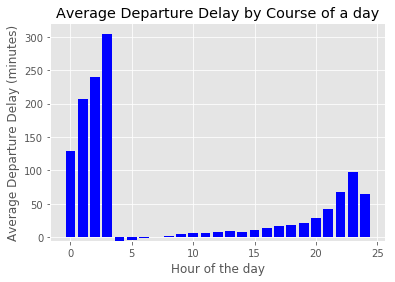

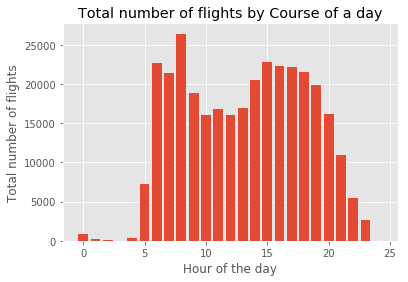

In [87]:
# Plotting average departure delay by course of a day.
plt.bar(range(len(flights_df.groupby('hour').mean().dep_delay)), flights_df.groupby('hour').mean().dep_delay, 
        color = 'blue')
plt.xlabel('Hour of the day')
plt.ylabel('Average Departure Delay (minutes)')
plt.title('Average Departure Delay by Course of a day')
plt.show()


# Analysing total number of flights for each hour of the day.
plt.bar(range(len(flights_df.groupby('hour').count())), flights_df.groupby('hour').count()['Unnamed: 0'])
plt.xlabel('Hour of the day')
plt.ylabel('Total number of flights')
plt.title('Total number of flights by Course of a day')
plt.show()

After analyzing the bar-chart (Average Departure Delay by Course of a day), it is evident that the average delay increases as the day progresses. A possible cause of this can be that delays in flights during the first half of the day cause more delays in flights during the latter half of the day. The hours from 1 a.m. to 4 a.m. can be considered as outliers as the total number of flights in this time range is very less compared to the number of flights at each of the hours from 5 a.m. to 12 a.m.

## Question 3
    Which flight departing NYC in 2013 flew the fastest?

In [88]:
#Calculating speed in miles per hour.
flights_df['speed'] = flights_df['distance']*60/flights_df['air_time']
columns = ['carrier', 'tailnum', 'flight', 'origin', 'dest','date', 'speed', 'distance', 'air_time']
flights_df.sort_values(['speed'], ascending=False)[columns].head(1)

,carrier,tailnum,flight,origin,dest,date,speed,distance,air_time
216447,DL,N666DN,1499,LGA,ATL,2013/5/25,703.384615,762,65.0


Delta Airlines (carrier DL) with a flight number of 1499 and tail number N666DN, travelling from LaGuardia Airport(LGA) airport to Hartsfield–Jackson Atlanta International Airport (ATL) was the flight that flew the fastest in 2013. It had a speed of 703.38 miles per hour.
 

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [107]:
# Your code here
flights_df['carrier_flight_dest'] = flights_df['carrier'].astype('str') + ' ' + flights_df['flight'].astype('str') + ' ' + flights_df['dest'].astype('str')

flights_by_carrier_flight_dest = flights_df.groupby('carrier_flight_dest').count()
flights_by_carrier_flight_dest = flights_by_carrier_flight_dest.rename(columns = {'Unnamed: 0' : 'count'})
flights_by_carrier_flight_dest = flights_by_carrier_flight_dest[flights_by_carrier_flight_dest['count'] == 365]
everyday_flights = flights_by_carrier_flight_dest.index.values.tolist()

destinations = []
for flight in everyday_flights:
    destination = flight[len(flight) - 3 : ]
    if(destination not in destinations):
        destinations.append(destination)

print('The flights that fly everyday are : ')
for flight in everyday_flights:
    print(flight)
    
print('The destinations that they fly to are : ')
for destination in destinations:
    print(destination)

The flights that fly everyday are : 
AA 119 LAX
AA 1357 SJU
AA 1611 MIA
AA 181 LAX
AA 59 SFO
B6 1783 MCO
B6 219 CLT
B6 359 BUR
B6 371 FLL
B6 431 SRQ
B6 703 SJU
DL 2159 MCO
DL 2391 TPA
EV 5712 IAD
UA 15 HNL
VX 251 LAS
VX 407 LAX
VX 413 LAX
The destinations that they fly to are : 
LAX
SJU
MIA
SFO
MCO
CLT
BUR
FLL
SRQ
TPA
IAD
HNL
LAS


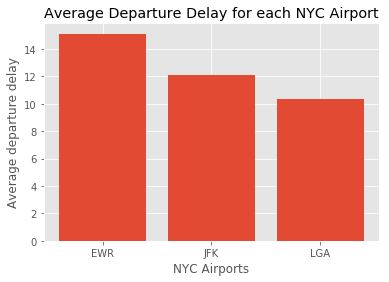

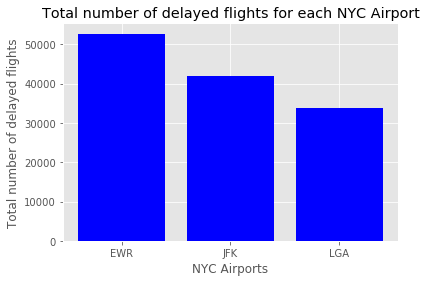

In [143]:
# Finding the best airport amongst the 3 airports in NYC
dep_delay_by_origin = flights_df.groupby('origin').mean()['dep_delay']
postions = np.arange(len(dep_delay_by_origin))
plt.bar(postions, dep_delay_by_origin)
plt.xlabel('NYC Airports')
plt.ylabel('Average departure delay')
plt.xticks(postions, dep_delay_by_origin.index.values)
plt.title('Average Departure Delay for each NYC Airport')
plt.show()


delayed_flights = flights_df[flights_df['dep_delay'] > 0]
delayed_flights = delayed_flights.groupby('origin').count().dep_delay
postions = np.arange(len(delayed_flights))
plt.bar(postions, delayed_flights, color = 'blue')
plt.xlabel('NYC Airports')
plt.ylabel('Total number of delayed flights')
plt.xticks(postions, delayed_flights.index.values)
plt.title('Total number of delayed flights for each NYC Airport')
plt.show()

Research Question: Which was the best NYC airport in 2013?

Criteria: The airport with the lowest average departure delay and the lowest number of delayed flights can be considered as the best airport in NYC in 2013.

Looking at both bar plots mentioned above, we can conclude that LaGuardia Airport (LGA), with an average departure delay of 10.34 minutes and 33690 delayed flights, was the best airport to fly out of NYC in the year 2013.


## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

In [203]:
# Your code here
weather_df = pd.read_csv('weather.csv')
weather_df = weather_df.groupby(['year','month','day','origin']).mean()
weather_df.reset_index(level = 0, inplace = True)
weather_df.reset_index(level = 0, inplace = True)
weather_df.reset_index(level = 0, inplace = True)
weather_df.reset_index(level = 0, inplace = True)
weather_df = weather_df[['origin','year','month','day','temp','dewp','humid','wind_dir','wind_speed','wind_gust','precip','pressure','visib']]
weather_df.head()

flights_agg_mean = flights_df.groupby(['year','month','day','origin']).mean()
flights_agg_mean.reset_index(level = 0, inplace = True)
flights_agg_mean.reset_index(level = 0, inplace = True)
flights_agg_mean.reset_index(level = 0, inplace = True)
flights_agg_mean.reset_index(level = 0, inplace = True)
flights_agg_mean.head()

flights_weather_joined = pd.merge(flights_agg_mean, weather_df, on=['year','month','day','origin'], how='inner')
flights_weather_joined['precip'] = flights_weather_joined['precip'] * 1000;
print(flights_weather_joined.head())

  origin  day  month  year   Unnamed: 0     dep_time  dep_delay     arr_time  \
0    EWR    1      1  2013   431.849180  1407.332237  17.483553  1568.815182   
1    EWR    2      1  2013  1313.745714  1345.773256  25.322674  1514.172012   
2    EWR    3      1  2013  2233.696429  1343.669670   8.450450  1542.600601   
3    EWR    4      1  2013  3149.581121  1336.442136  12.103858  1504.557864   
4    EWR    5      1  2013  3961.735294  1295.489451   5.696203  1500.594937   

   arr_delay       flight  ...         speed     temp       dewp      humid  \
0  20.886667  2276.868852  ...    353.485069  38.4800  25.050435  58.386087   
1  25.439883  2389.082857  ...    357.307900  28.8350  11.382500  47.786250   
2   6.102719  2350.369048  ...    365.006257  29.4575  14.780000  54.395833   
3   1.768546  2388.061947  ...    379.974857  33.4775  19.205000  55.880417   
4  -1.367089  2065.399160  ...    374.156009  36.7325  19.242500  49.284583   

     wind_dir  wind_speed  wind_gust  precip

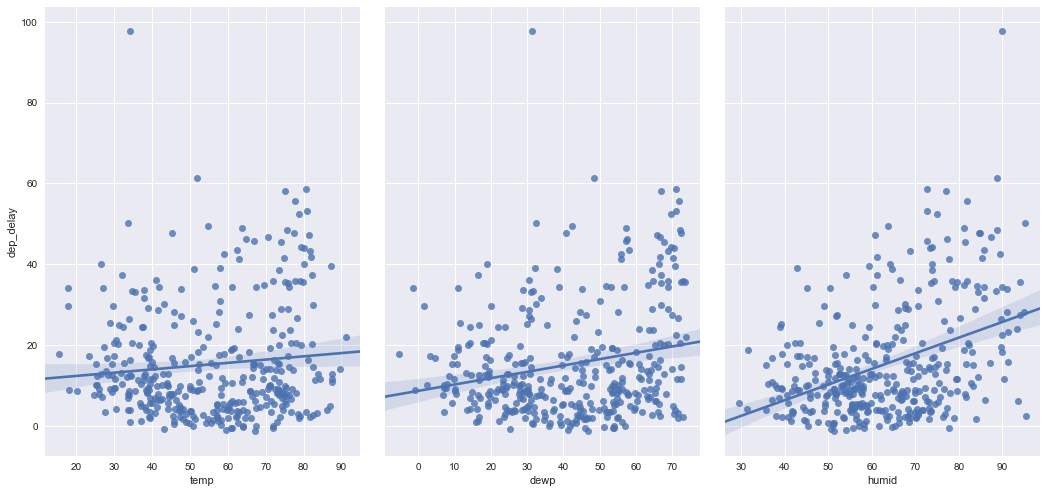

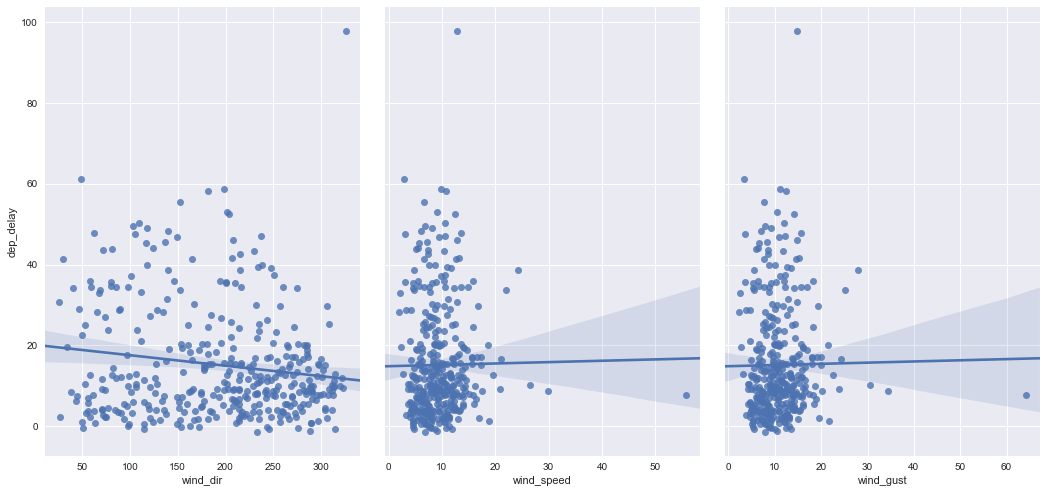

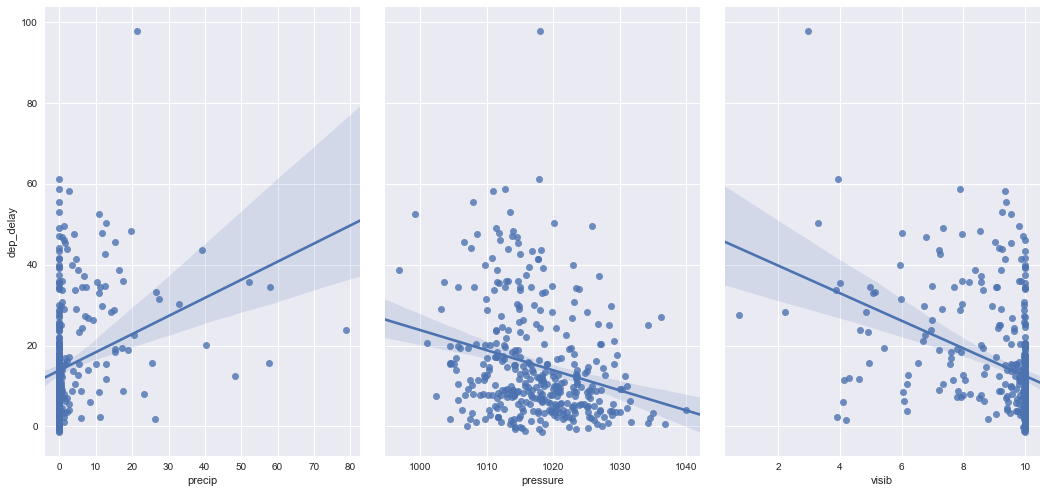

In [190]:
import seaborn as sns
%matplotlib inline

sns.pairplot(flights_weather_joined, x_vars = ['temp','dewp','humid'], y_vars = 'dep_delay', size = 7,
             aspect = 0.7, kind='reg')
sns.pairplot(flights_weather_joined, x_vars = ['wind_dir', 'wind_speed','wind_gust'], y_vars = 'dep_delay', size = 7,
             aspect = 0.7, kind='reg')
sns.pairplot(flights_weather_joined, x_vars = ['precip', 'pressure','visib'], y_vars = 'dep_delay', size = 7,
             aspect = 0.7, kind='reg')


After examining the scatter-plots of the departure delays of flights with respect to all nine weather related factors (temperature, dewpoint, humidity, wind direction, wind speed, wind gust, precipitation, pressure, and visibility), the following conclusions can be made:  
1. There seems to be a fairly strong positive correlation between humidity and departure delay.
2. There seems to be a fairly strong positive correlation between precipitation and departure delay.
3. There seems to be a fairly weak positive correlation between temperature (air) and departure delay.
4. There seems to be a fairly strong negative correlation between visibility and departure delay.

Linear Regression can be used to affirm the findings from the scatter plots.
Performing a multiple linear regression to check the correlation between departure delay and the four factors including humidity, precipitation, temperature, and visibility. 

In [194]:
from sklearn.linear_model import LinearRegression
x = flights_weather_joined[['temp','precip','humid','visib']]
y = flights_weather_joined['dep_delay']
linreg = LinearRegression()
linreg.fit(x, y)
print (linreg.intercept_)
print (linreg.coef_)
list(zip(['temp','precip','humid','visib'], linreg.coef_))

16.1850817975
[ 0.05151385  0.18351138  0.19413555 -1.80366646]


[('temp', 0.051513847934691104),
 ('precip', 0.18351138351917301),
 ('humid', 0.19413554596886357),
 ('visib', -1.8036664620826102)]

The linear regression equation is as follows: 

y (Departure Delay) = 16.18 + 0.05 x Temperature + 0.18 x Precipitation + 0.19 x Humidity - 1.80 x Visibility

The interpretation is as follows:

For a given value of precipitation, humidity, visibility, a unit increase in temperature increases the departure delay by 0.05 minutes.

For a given value of temperature, humidity, visibility, a unit increase in precipitation increases the departure delay by 0.18 minutes.

For a given value of precipitation, humidity, temperature, a unit increase in visibility decreases the departure delay by 1.80 minutes.

For a given value of precipitation, temperature, visibility, a unit increase in humidity increases the departure delay by 0.19 minutes.